# C14-hepatocyte analysis

In [2]:
import datetime
from IPython.display import display
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

mem = joblib.Memory(location='~/tmp/hepato/', verbose=0)

import logging

%load_ext rpy2.ipython

# logging.basicConfig(filename='c14.log',
#                              filemode='a',
#                              format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
#                             datefmt='%H:%M:%S',
#                              level=logging.DEBUG)
logging.basicConfig(level=logging.WARNING)

In [3]:
%%R
library(ggplot2)

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

In [5]:
# %load_ext autoreload
# %autoreload 2
import c14
import c14.models.liver
import c14.models.minimal

In [11]:
parameters = pd.read_hdf('../../../data/R_pt.pandas').reset_index()
parameters['time'] -= 0.5

In [12]:
parameters.head()

,time,para,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
0,-0.5,delta2,0.443817,0.187959,0.177931,0.833562,0.003604,0.002549,2719.602619,2719.602619,2757.407725,9105.358472,1.053975
1,-0.5,delta4,0.063612,0.051767,0.001001,0.136616,0.001466,0.001037,1246.088815,1246.088815,1041.678231,2531.011637,1.129736
2,-0.5,kappa24,0.002532,0.001218,0.001000,0.004730,0.000024,0.000017,2559.521246,2559.521246,2600.059351,6296.312424,1.059150
3,-0.5,kappa42,0.054310,0.050481,0.001000,0.134009,0.001515,0.001071,1110.438654,1110.438654,1038.341595,4028.025375,1.133182
4,-0.5,r2,0.436371,0.187958,0.171432,0.826768,0.003596,0.002543,2731.690276,2731.690276,2785.094694,9236.768144,1.053627


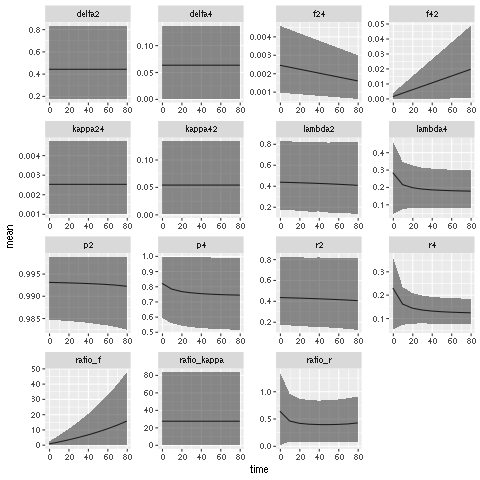

In [13]:
%%R -i parameters
ggplot(parameters, aes(x=time, y=mean, ymin=hpd_3., ymax=hpd_97.)) + 
    facet_wrap(~para, scale='free') +
    geom_line() +
    geom_ribbon(aes(alpha = 0.1), show.legend=F)

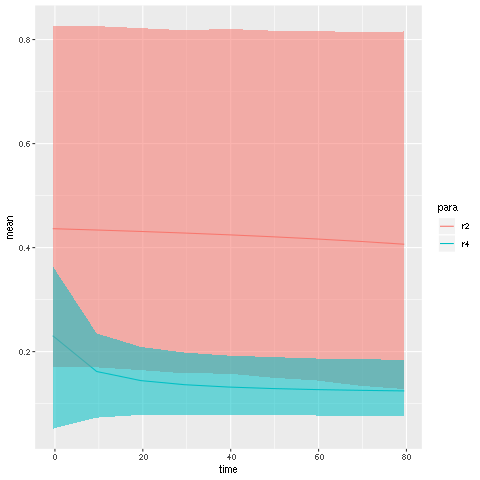

In [14]:
%%R -i parameters
ggplot(parameters[parameters$para %in% c('r2', "r4"),],
       aes(x=time, y=mean, ymin=hpd_3., ymax=hpd_97., fill=para)) + 
    geom_line(aes(color=para)) +
    geom_ribbon(aes(alpha = 0.0001), show.legend=F)

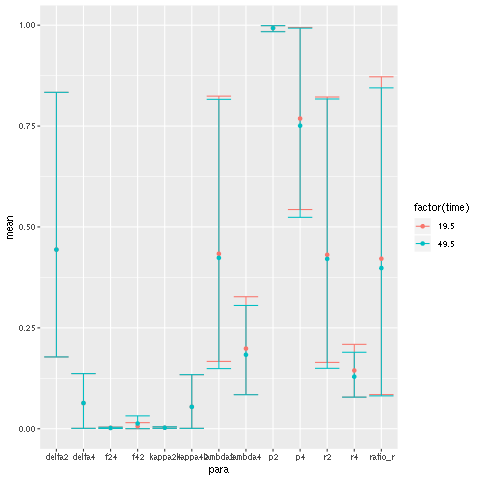

In [17]:
%%R -i parameters
ggplot(parameters[(parameters$time %in% c(19.5, 49.5)) & !(parameters$para %in% c('ratio_kappa', 'ratio_f')), ], aes(x=para, y=mean, ymin=hpd_3., ymax=hpd_97., color=factor(time))) + 
    geom_errorbar() + 
    geom_point()

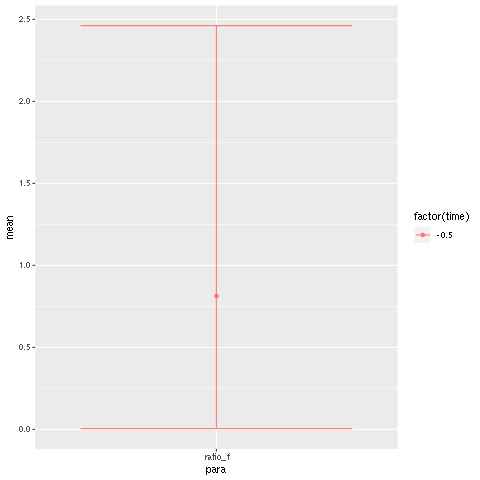

In [24]:
%%R -i parameters
ggplot(parameters[(parameters$time %in% c(-0.5)) & (parameters$para %in% c('ratio_f')), ], aes(x=para, y=mean, ymin=hpd_3., ymax=hpd_97., color=factor(time))) + 
    geom_errorbar() + 
    geom_point()